<h2 style="color:#22198A">NOTEBOOK SETUP</h2>
<p>Before you start working with the notebook, please make sure to go through this setup to ensure smooth running. (by default, no changes should be needed if you just downloaded the repository)</p>
<h3 style="color:green">Important highlights</h3>
<ul>
<li><b>BASE_DIR:</b> This should lead to the root directory relative to the location of this notebook</li>
<li><b>SCRIPTS IMPORT:</b> All scripts are saved within one file. In the file, there are comments splitting the whole file into sections which gather scripts with similar functionality, e.g. loading data. All functions should contain a docstring, which might be useful for any troubleshooting or just knowing how the given thing was implemented. The way the scripts are imported was implemented according to <a href='# https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
'>this</a> SO question. <b>Once you run the below cell, all scripts should be loaded.</b></li>
<li><b>PACKAGES USED WITHIN DIRECTORY: </b> In <b>all_scripts.py</b> you can see in the beginning all the packages used, but it is worth highlight these "not so standard" packages which you should make sure you have installed: <b>pandas, scipy.</b> Altenrnatively, you can also use provided <b>requirements.txt.</b></li>
</ul>

In [ ]:
import os
import sys
BASE_DIR = f"..{os.sep}..{os.sep}..{os.sep}"
USE_DEEPNOTE = True # In case you would open this notebook via Deepnote

# SCRIPTS IMPORT
scripts_path = os.path.abspath(os.path.join(f'{BASE_DIR}scripts'))

if scripts_path not in sys.path:
    # Add the scripts to the path
    sys.path.append(scripts_path)
    
    # Import the needed scripts
    from all_scripts import *
    
    # Remove the added path to avoid possible future conflicts
    sys.path.remove(scripts_path)
else:
    
    # Import the needed scripts
    from all_scripts import *
    
    # Remove the added path to avoid possible future conflicts
    sys.path.remove(scripts_path)

# PLOTS COLOR SETTING - see more here: https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
PLOT_COLOR_SETTINGS = sns.color_palette("flare", as_cmap=True)

<h2 style="color:#22198A">LIBRARIES</h2>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<h2 style="color:#22198A">CONSTANTS</h2>

In [ ]:
PATH_DATA = {
    "raw": f"{BASE_DIR}data{os.sep}raw{os.sep}"
}

FILENAMES = {
    "GT_train_ISIC_2017": "ISIC-2017_Training_Part3_GroundTruth.csv",
    "GT_validate_ISIC_2017": "ISIC-2017_Validation_Part3_GroundTruth.csv",
    "GT_test_ISIC_2017": "ISIC-2017_Test_v2_Part3_GroundTruth.csv"
}

<h2 style="color:#22198A">LOAD DATA</h2>

In [ ]:
 all_dfs_raw = {
    "train": pd.read_csv(f"{PATH_DATA['raw']}{FILENAMES['GT_train_ISIC_2017']}"),
    "validate": pd.read_csv(f"{PATH_DATA['raw']}{FILENAMES['GT_validate_ISIC_2017']}"),
    "test": pd.read_csv(f"{PATH_DATA['raw']}{FILENAMES['GT_test_ISIC_2017']}")
}

<h2 style="color:#22198A">Task 0: Exploring the data</h2>

<h3 style="color:green">Feature and diagnosis data</h3>

<h4 style="color:#ff9900">Shape of data</h4>

In [ ]:
FEATURES_RAW.shape

NameError: name 'FEATURES_RAW' is not defined

In [ ]:
GROUND_TRUTH_RAW.shape

(150, 3)

<h4 style="color:#ff9900">Checking for missing values</h4>

In [ ]:
FEATURES_RAW.isna().sum()

id           0
area         0
perimeter    0
dtype: int64

In [ ]:
GROUND_TRUTH_RAW.isna().sum()

image_id                0
melanoma                0
seborrheic_keratosis    0
dtype: int64

<h4 style="color:#ff9900">Variable types</h4>

In [ ]:
FEATURES_RAW.head()

,id,area,perimeter
0,ISIC_0001769,216160.0,2013.0
1,ISIC_0001852,130493.0,1372.0
2,ISIC_0001871,205116.0,1720.0
3,ISIC_0003462,161705.0,1344.0
4,ISIC_0003539,317040.0,2063.0


Feature data: 1 identifier variable (id), 2 numeric variables.

In [ ]:
GROUND_TRUTH_RAW.head()

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0001769,0.0,0.0
1,ISIC_0001852,0.0,0.0
2,ISIC_0001871,0.0,0.0
3,ISIC_0003462,0.0,0.0
4,ISIC_0003539,0.0,0.0


Diagnosis data: 1 identifier variable (id), 2 categroical variables (binary variables for disease y/n)

<h4 style="color:#ff9900">Mergning data tables</h4>

Merging both dataframes on picture id:

In [ ]:
# Renaming 'id' variable in FEATURES_RAW to avoid duplicating columns when merging
FEATURES_RAW.rename(columns={'id':'image_id'}, inplace=True)

In [ ]:
# Merging dataframes on 'image_id'
FEATURES_DIAGNOSIS = pd.merge(FEATURES_RAW, GROUND_TRUTH_RAW, on='image_id')

In [ ]:
FEATURES_DIAGNOSIS.head()

,image_id,area,perimeter,melanoma,seborrheic_keratosis
0,ISIC_0001769,216160.0,2013.0,0.0,0.0
1,ISIC_0001852,130493.0,1372.0,0.0,0.0
2,ISIC_0001871,205116.0,1720.0,0.0,0.0
3,ISIC_0003462,161705.0,1344.0,0.0,0.0
4,ISIC_0003539,317040.0,2063.0,0.0,0.0


<h4 style="color:#ff9900">Inspecting variables</h4>

Min, max and distribution of 'area' and 'perimeter' (numeric) variables:

In [ ]:
# Find min and max values
FEATURES_DIAGNOSIS.agg([min, max]).iloc[:,1:3]

,area,perimeter
min,32944.0,642.0
max,27706864.0,25900.0


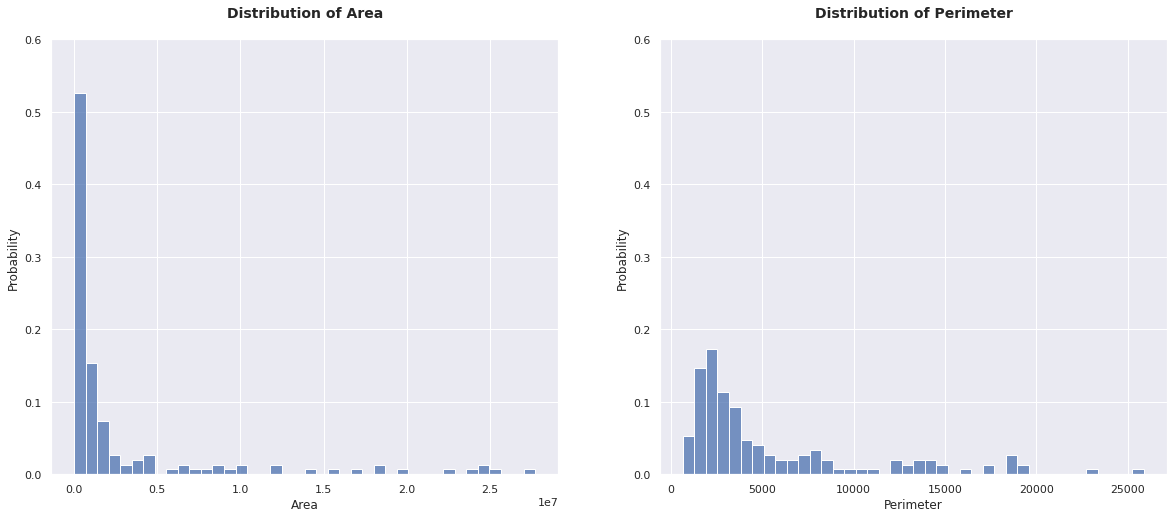

In [ ]:
# Set up figure
sns.set(rc={'figure.figsize':(20,8)})
fig, axs = plt.subplots(1, 2);
fig.subplots_adjust(hspace=1.2) # Adjust the horizontal space between the subplots

# Iterate over numeric variable and display their distribution
for ax, var_name in zip(axs, ["area", "perimeter"]):

    # Plot the data
    sns.histplot(x=var_name, data=FEATURES_DIAGNOSIS, palette=sns.color_palette("flare"), ax=ax, stat="probability", bins=40)
    
    # Set y-label
    ax.set_ylabel("Probability")

    # Set y-limit so both graphs are comparable
    ax.set_ylim(0, 0.6)

    # Gets rid of underscore in the name - if needed
    var_name = ' '.join(var_name.split('_')).capitalize()

    # Set x-label
    ax.set_xlabel(var_name, size=12)

    # Set the title
    ax.set_title(f"Distribution of {var_name}\n", size=14, weight="bold")

Distribution of diagnosis (binary) variables:

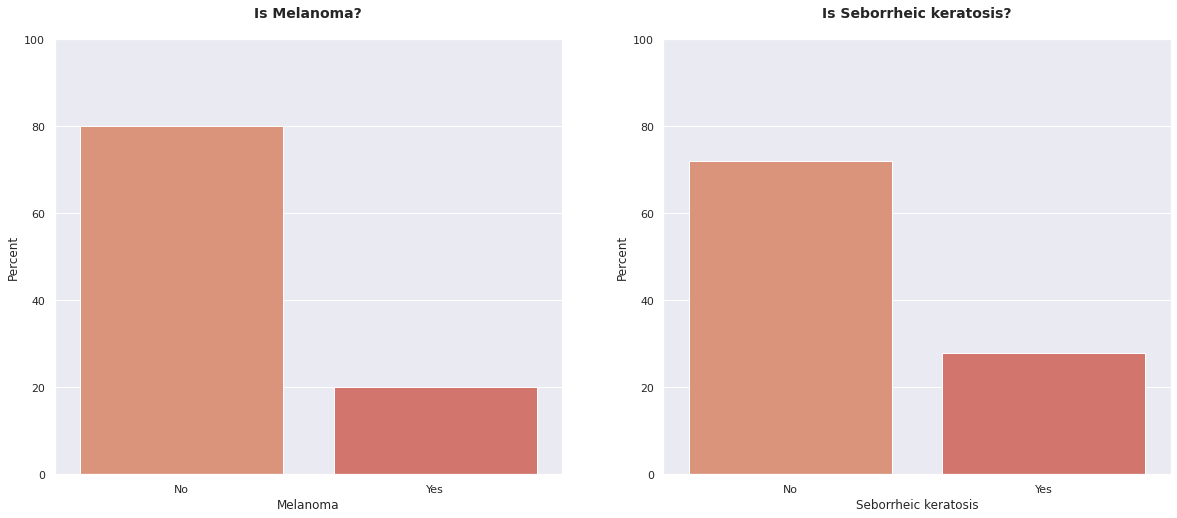

In [ ]:
# Set up figure
sns.set(rc={'figure.figsize':(20,8)})
fig, axs = plt.subplots(1, 2);
fig.subplots_adjust(hspace=1.2) # Adjust the horizontal space between the subplots

# Iterate over binary variables and display their distribution
for ax, var_name in zip(axs, ["melanoma", "seborrheic_keratosis"]):

    # Plot the data - let yaxis be the percentage
    sns.barplot(x=var_name, y=var_name, data=FEATURES_DIAGNOSIS, estimator=lambda x: len(x)/len(FEATURES_DIAGNOSIS)*100, palette=sns.color_palette("flare"), ax=ax)

    # Set y-label
    ax.set_ylabel("Percent")

    # Set y-limit so both graphs are comparable
    ax.set_ylim(0, 100)

    # Set x-ticks labels
    ax.set_xticklabels(["No", "Yes"])

    # Gets rid of underscore in the name - if needed
    var_name = ' '.join(var_name.split('_')).capitalize()

    # Set x-label
    ax.set_xlabel(var_name, size=12)

    # Set the title
    ax.set_title(f"Is {var_name}?\n", size=14, weight="bold")

<h3 style="color:green">Image data</h3>

<h4 style="color:#ff9900">Loading an image and corresponding segmentation mask</h4>

In [ ]:
from PIL import Image

# Get list of image ids
image_id = list(GT_train_ISIC_2017["image_id"])

# Define filenames related to image id
file_image = PATH_DATA["pictures-examples-raw"] + image_id[0] + '.jpg'
file_mask = PATH_DATA["pictures-segment-raw"] + image_id[0] + '_segmentation.png'

# Read the image and mask
im = plt.imread(file_image)
mask = plt.imread(file_mask)

# Load images as Image objects  
im_im = Image.open(file_image) 
mask_im = Image.open(file_mask)

In [ ]:
# Get all image sizes (in pixels) - THIS RUNS FOREVER THOUGH (tried to eval. image sizes)
#for i in image_id:
#    file_image = PATH_DATA["pictures-examples-raw"] + i + '.jpg'
#    im = plt.imread(file_image)
#    print(im.shape)

<h4 style="color:#ff9900">Show images</h4>

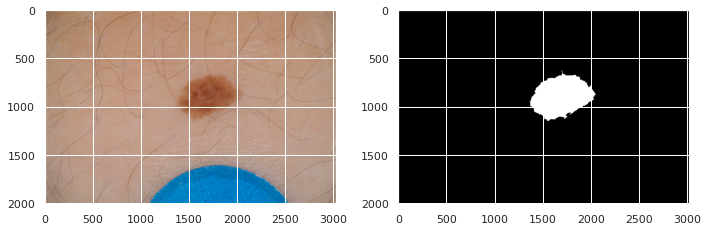

In [ ]:
# Set up figure
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 12)
fig.subplots_adjust(hspace=0.1) # Adjust the horizontal space between the subplots

# Show image and mask
axes[0].imshow(im)
axes[1].imshow(mask, cmap='gray')
fig.tight_layout()


<h4 style="color:#ff9900">Image dimensions and values</h4>

In [ ]:
print("Image shape:", im.shape)
print("Mask shape:", mask.shape)

Image shape: (2016, 3024, 3)
Mask shape: (2016, 3024)


Both images have the same pixel values (same size). The color image is an array with 3 dimensions (y, x, R-G-B color channels) of integers. The mask image is an array with 2 dimensions (y, x) with values 0 or 1.

In [ ]:
# Example of RGB values in one image pixel
print("Image RGB value:", im[2000,1300,:]) # the blue color

# Example of image value in two different mask pixels
print("Mask value within lesion:", mask[1000, 1500], "\nMask value outside lesion:", mask[0, 0] )

Image RGB value: [  0 129 199]
Mask value within lesion: 1.0 
Mask value outside lesion: 0.0


<h4 style="color:#ff9900">Overlaying images</h4>

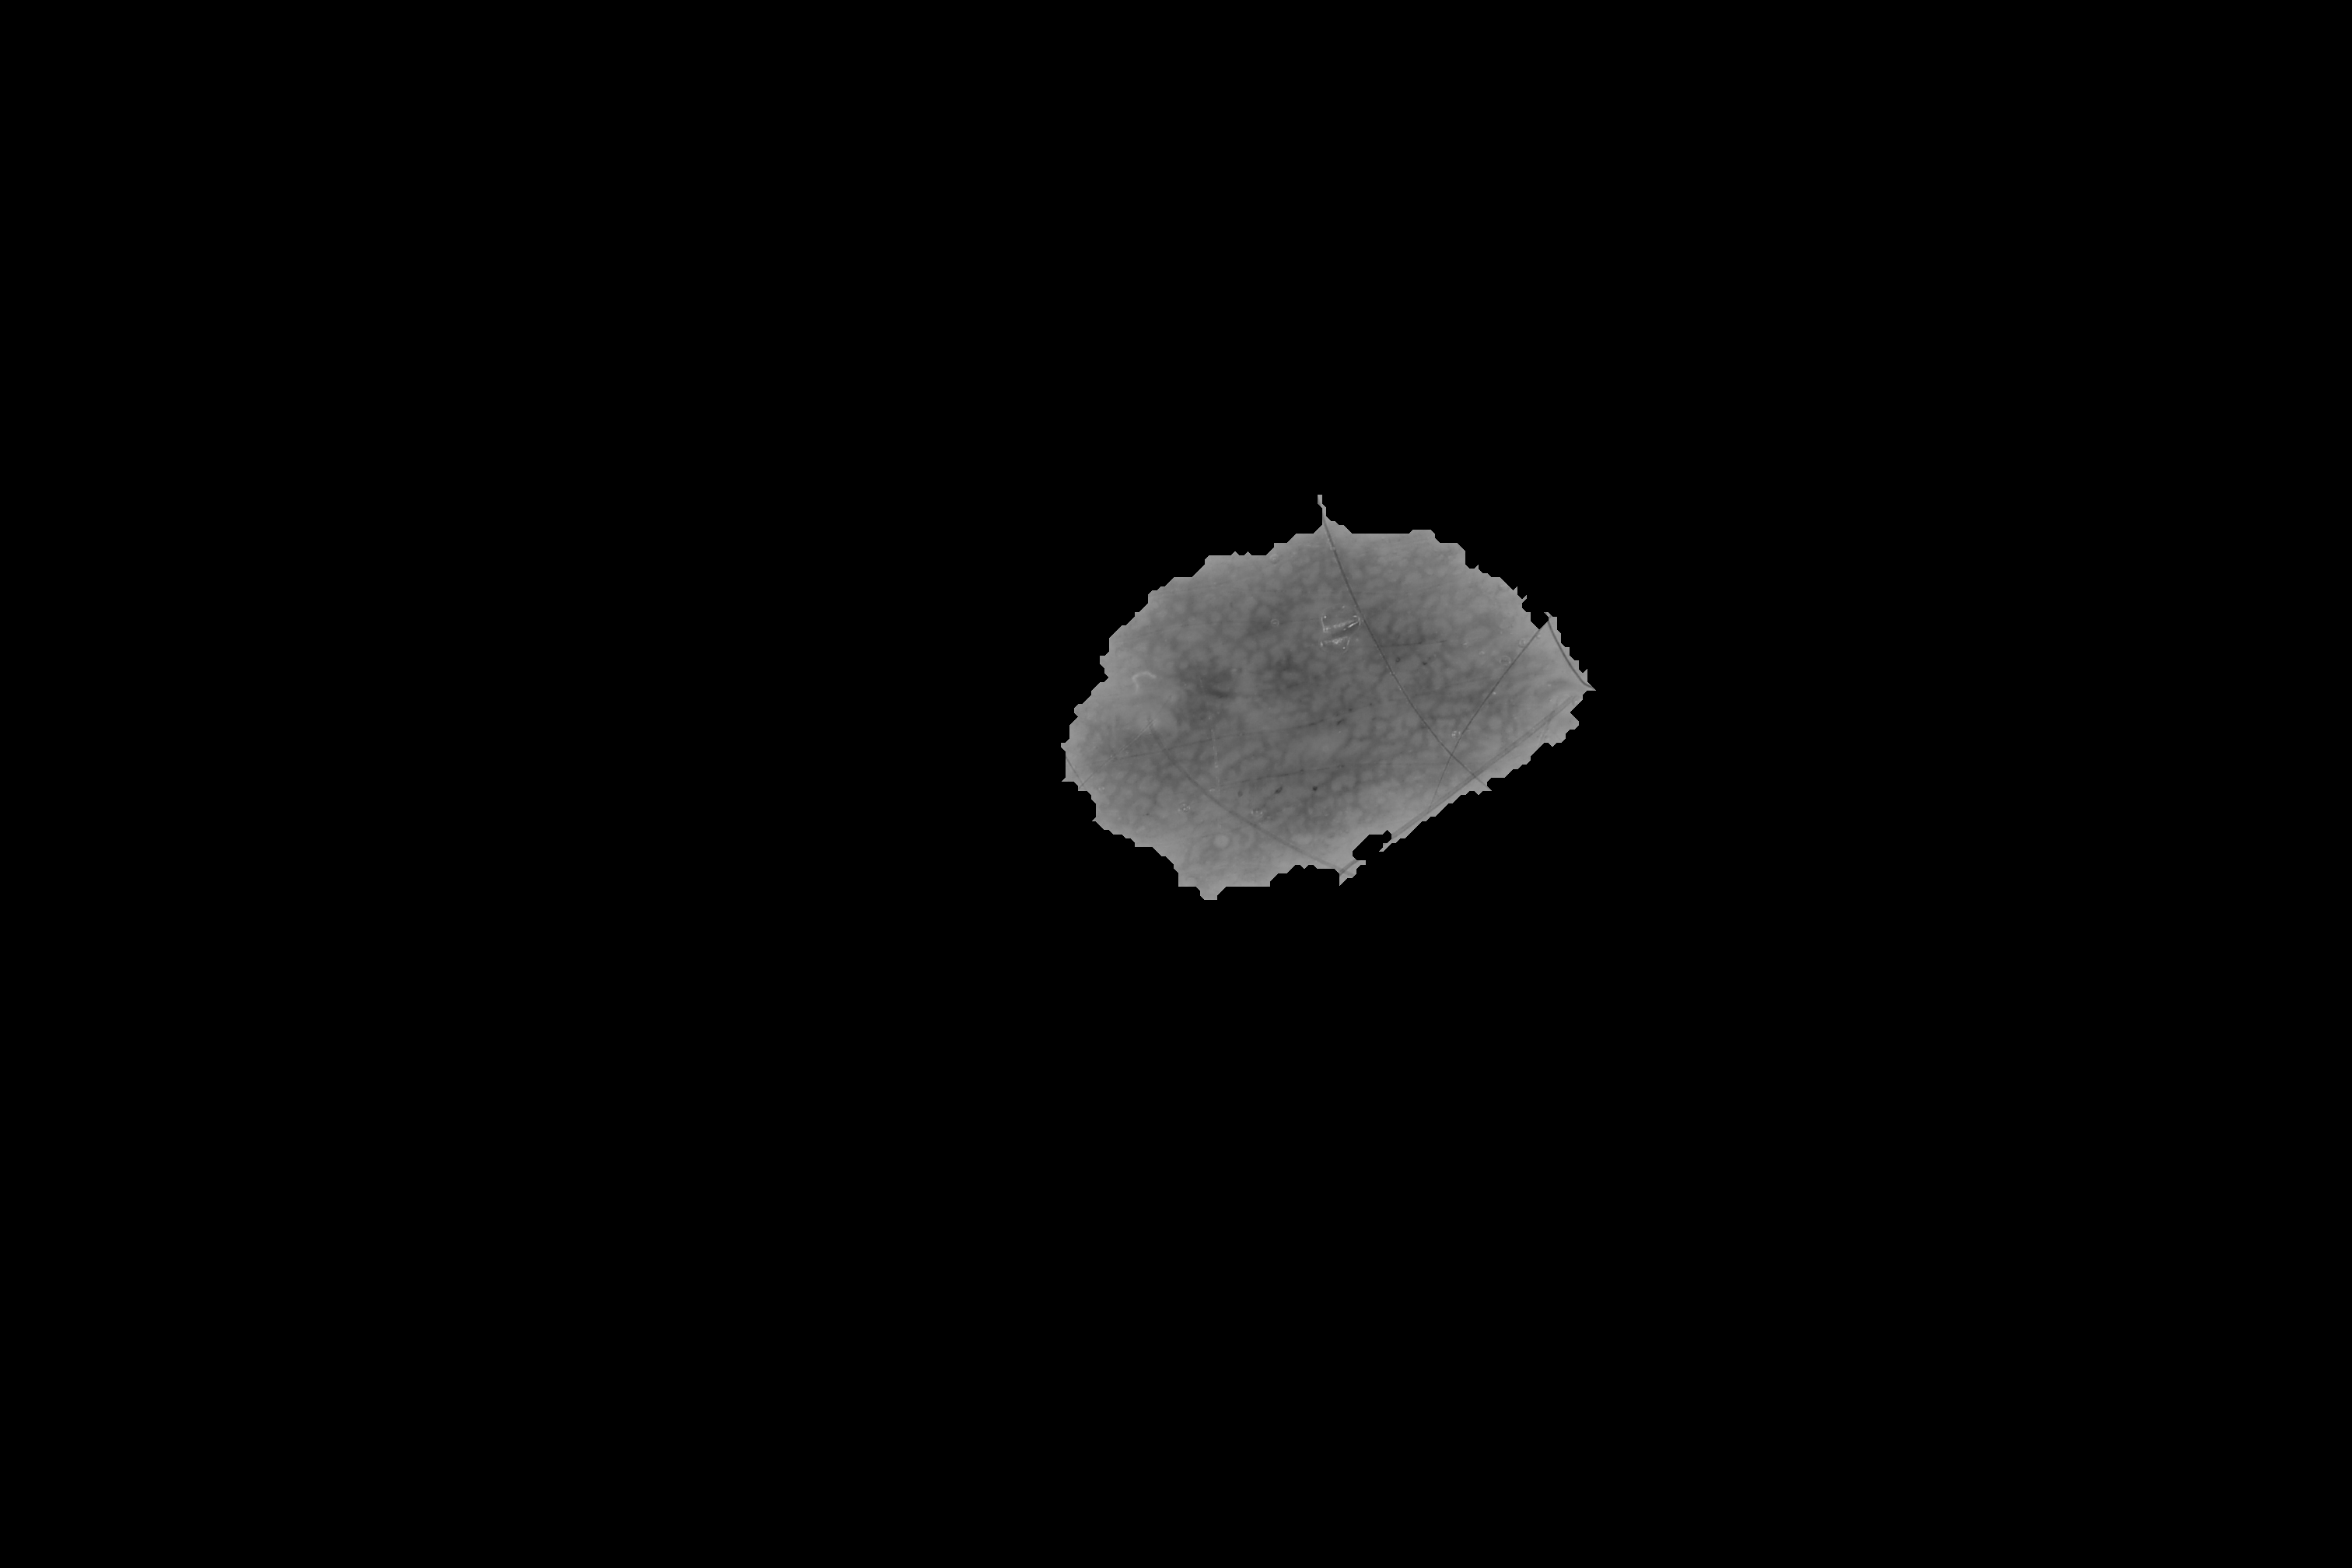

(3024, 2016)


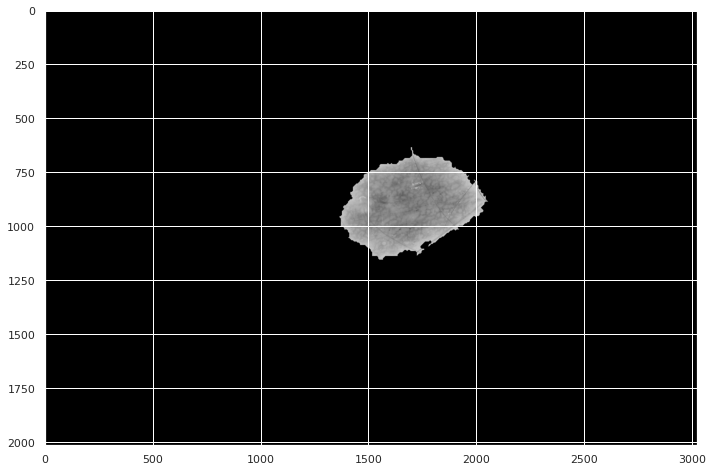

In [ ]:
# Overlay Image objects 
mask_im.paste(im_im, (0,0), mask=mask_im) 
  
# Display overlay
mask_im.show()  # This doesn't actually display an image in Google Colab :(
plt.imshow(mask_im, cmap='gray')  

# Note: this is a now a single channel image
print(mask_im.size) 

<h4 style="color:#ff9900">Replacing non-lesion pixels</h4>
Alternative to overlaying the images.

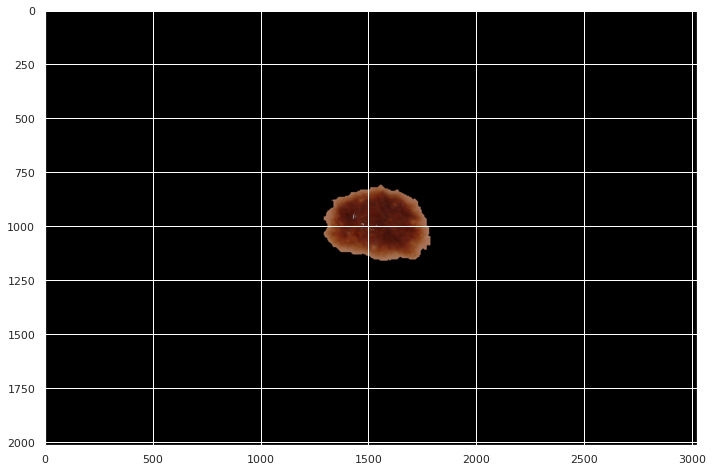

In [ ]:
# Get list of image ids
image_id = list(GROUND_TRUTH_RAW["image_id"])

# Redefine filenames related to image id
file_image = PATH_DATA["pictures-examples-raw"] + image_id[1] + '.jpg'
file_mask = PATH_DATA["pictures-segment-raw"] + image_id[1] + '_segmentation.png'

# Reread image and mask
im = plt.imread(file_image)
mask = plt.imread(file_mask)

# Using mask to select pixels to color
im_crop = im.copy()
im_crop[mask==0] = 0 #color 0 = black
  
# Display image
plt.imshow(im_crop)

In [ ]:
type(im)

numpy.ndarray

<h4 style="color:#ff9900">Sampling and replacing colors</h4>

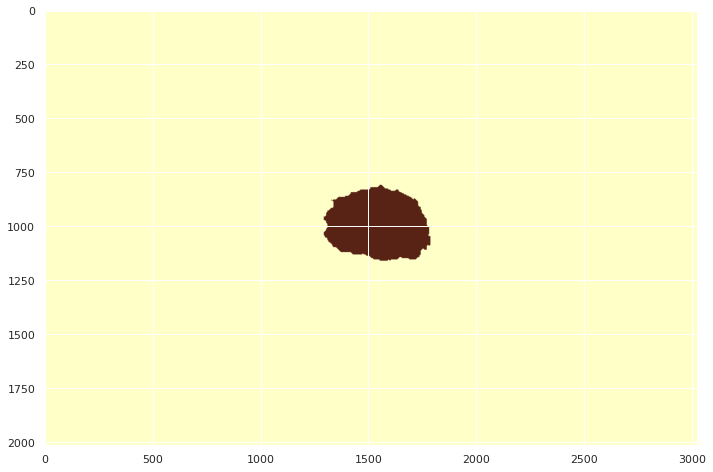

In [ ]:
# Extracting a color from the lesion
lesion_color = im[1000,1500,:]

# Creating a color from RGB code
yellow = [255, 255, 200]

# Using mask to select pixels to color
img_col = im.copy()
img_col[mask==1] = lesion_color # lesion area
img_col[mask==0] = yellow # non-lesion area
  
# Display image
plt.imshow(img_col)


<h4 style="color:#ff9900">Using mask to measure size of lesion</h4>

This measure is relative, though, since it only gives the size in pixels.

In [ ]:
def lesion_dim(mask,x, y):
    ''' function to measure height and width of a lesion, 
    in pixels, using a mask image. Parameters:
    mask = mask image
    x = x-value for selected pixel
    y = y-value for selected pixel
    '''
    y_pixels = []
    x_pixels = []

    if mask[y,x] == 1:
        for i in range(len(mask[0,:])): # length of x-axis
            if mask[y,i] == 1:
                x_pixels.append(i)
        
        for i in range(len(mask[:,1])): # length of y-axis
            if mask[i,x] == 1:
                y_pixels.append(i)
        
        height = max(y_pixels)-min(y_pixels)
        width = max(x_pixels)-min(y_pixels)

        print(height, "x", width)
    
    else:
        print("Point is outside range of lesion")
    
 

In [ ]:
lesion_dim(mask, 1000, 1250)
lesion_dim(mask, 1500, 1000)

Point is outside range of lesion
306 x 939


Another way to do it: Adding all lesion values (1's) in the picture together

In [ ]:
np.sum(mask)

130493.0

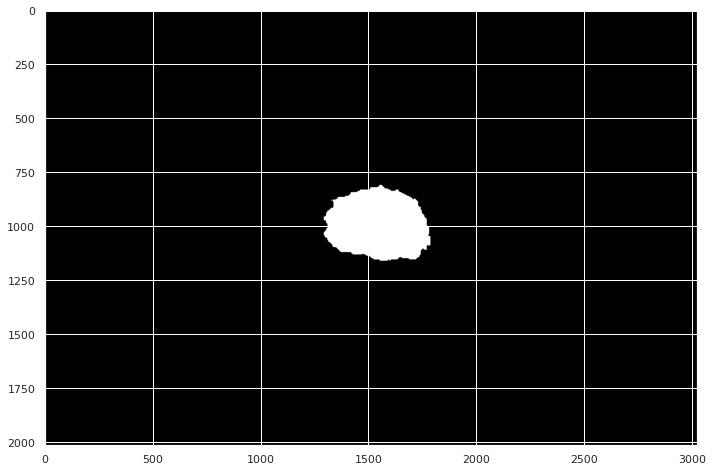

In [ ]:
plt.imshow(mask, cmap='gray')

Finding top/bottom and left/right (row and columns) for lesion:

In [ ]:
## THIS CODE IS FROM MARIO's NOTEBOOK ##
def find_topbottom(mask):
    for index,row in enumerate(mask):
        if sum(row)>0:
            top = index
            break
    found = False
    for index,row in enumerate(mask[top:]):
        if sum(row)==0:
            bottom = index + top - 1
            found = True
            break
    if not found: # In case the 1s go all the way down to the bottom and therefore bottom is never assigned in the loop
        bottom = len(mask)-1 
    return top, bottom


def find_leftright(mask):
    for index,column in enumerate(mask.T):
        if sum(column)>0:
            left = index
            break
    found = False
    for index,column in enumerate(mask.T[left:]):
        if sum(column)==0:
            right = index + left - 1
            found = True
            break
    if not found: # In case the 1s go all the way to the right and therefore right is never assigned in the loop
        right = len(mask.T)-1 
    return left, right

In [ ]:
top, bottom = find_topbottom(mask)
left, right = find_leftright(mask)

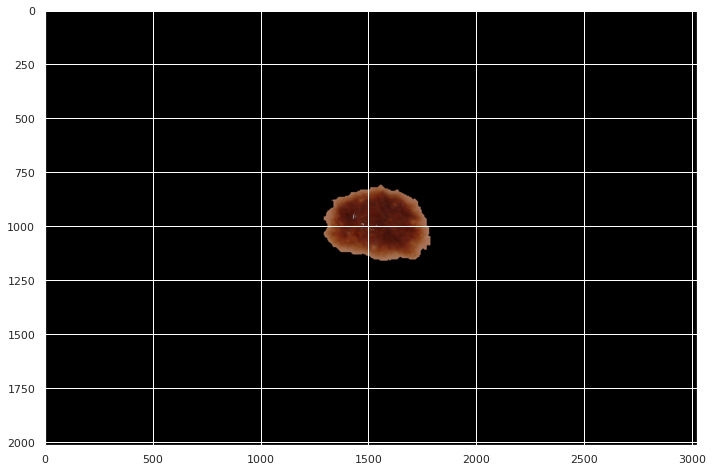

In [ ]:
plt.imshow(im_crop)

Testground for function parts:

In [ ]:
# USING Y-VALUE
x_range = []
for i in range(len(mask[0,:])): # length of x-axis
    if mask[1250,i] == 1: # y-value = 1000
        x_range.append(i)

# USING X-VALUE
y_range = []
for i in range(len(mask[:,1])): # length of x-axis
    if mask[i,1000] == 1: # x-value = 1500
        y_range.append(i)

print(y_range)
print(x_range)

[]
[]


<h2 style="color:#22198A">Task 1: Implementing features</h2>

<h3 style="color:green">Symmetry</h3>

<h4 style="color:#ff9900">Using mask to measure lesion symmetry</h4>

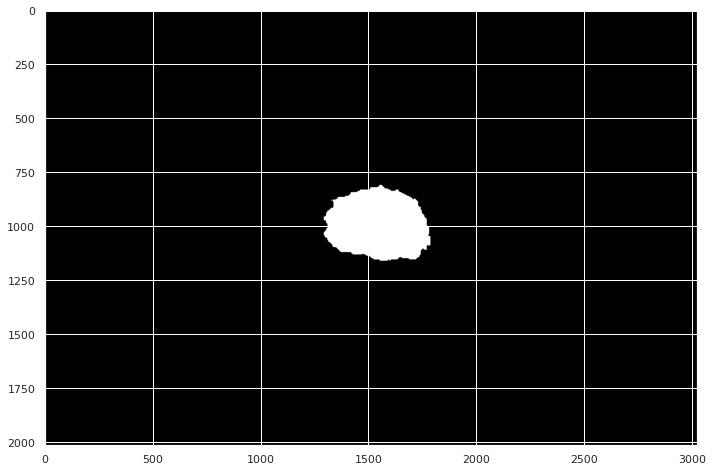

In [ ]:
plt.imshow(mask, cmap='gray')

Dividing image into four sectors using max width and height:

In [ ]:
# Measuring max with and height
max_height = np.max(np.sum(mask, axis=0))
max_width = np.max(np.sum(mask, axis=1))

# Getting center point for "folding" the mask shape
column = np.where(np.sum(mask, axis=0) == np.max(np.sum(mask, axis=0)))[0]
row = np.where(np.sum(mask, axis=1) == np.max(np.sum(mask, axis=1)))[0]

print("Max height (pixels):", max_height,"\nMax width (pixels):", max_width)
print("Max height column:", column[0], "\nMax width row:", row[0])

Max height (pixels): 352.0 
Max width (pixels): 489.0
Max height column: 1552 
Max width row: 1048


In [ ]:
# Slicing mask into four regions using center point
left_half = mask[:,:column[0]]
right_half = mask[:,column[0]:]
top_half = mask[:row[0],:]
bottom_half = mask[row[0]:,:]

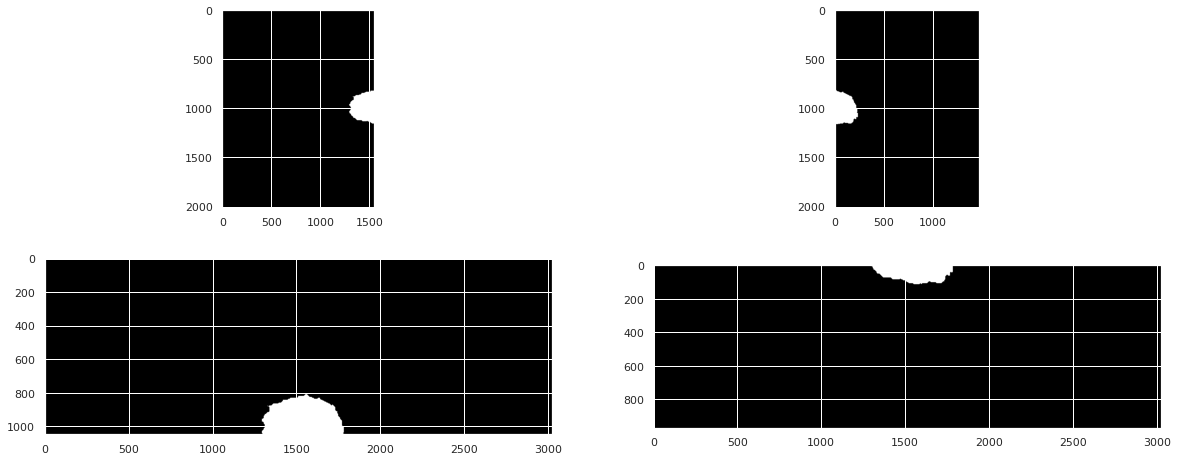

In [ ]:
# Plotting all four regions
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(left_half, cmap='gray')
axarr[0,1].imshow(right_half, cmap='gray')
axarr[1,0].imshow(top_half, cmap='gray')
axarr[1,1].imshow(bottom_half, cmap='gray')


Dividing mask using functions from 'all_scripts'. This method uses 'centroid' instead of min/max center point.

In [ ]:
# Getting centroid coordinates
xCoord, yCoord = findCentroid(mask)

# Dividing image into four sectors (flipping left and lower half)
lower, upper = halveTheRegionVertically(xCoord, mask)
left, right = halveTheRegionHorizontally(yCoord, mask)

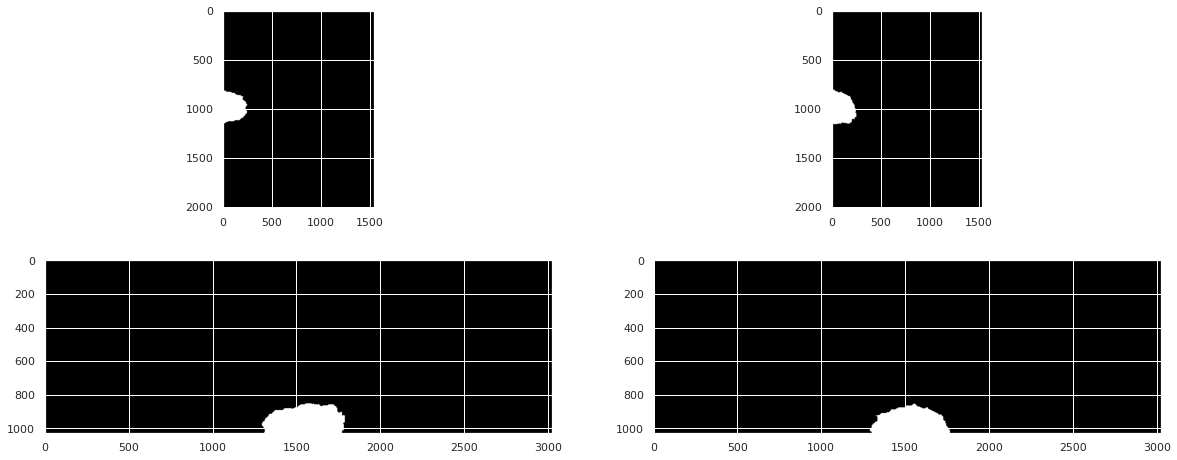

In [ ]:
# Plotting all four regions
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(lower, cmap='gray')
axarr[0,1].imshow(upper, cmap='gray')
axarr[1,0].imshow(left, cmap='gray')
axarr[1,1].imshow(right, cmap='gray')

In [ ]:
# Subtracting upper/lower part of mask from each other and normalizing the result
mask_asymmetry_level = computeAsymmetry(mask)
mask_asymmetry_level

0.018669998490459506

Testing code with perfect circle:

100 - 2.4855628144813638e-05
200 - 1.2456956765461929e-05
300 - 8.309907094821756e-06
400 - 6.234186554715856e-06
500 - 4.91315382109381e-06


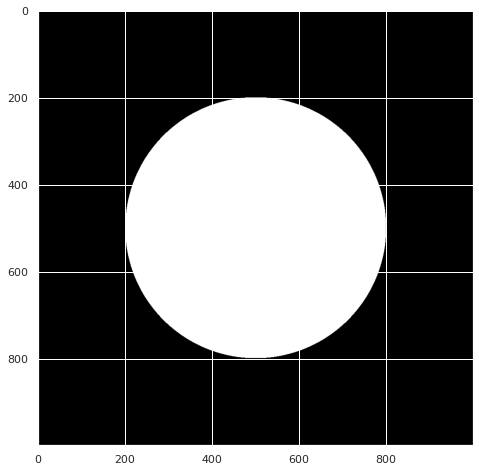

In [ ]:
import numpy as np
from skimage.draw import disk

# Creating a perfect circle in np binary array
circle_test = np.zeros((1000, 1000), dtype=np.uint8)
center_of_disk = (500, 500)
perimeter_disk = 300
rr, cc = disk(center_of_disk, perimeter_disk)
circle_test[rr, cc] = 1

# Plotting test circle
plt.imshow(circle_test, cmap='gray')

# Computing asymmetry value for diffrent circle sizes (image = constant size)
for i in range(100, 501, 100):
    
    # Creating different sizes of the circle
    circle_test = np.zeros((1000, 1000), dtype=np.uint8)
    center_of_disk = (500, 500)
    perimeter_disk = i
    rr, cc = disk(center_of_disk, perimeter_disk)
    circle_test[rr, cc] = 1 
        
    print(i, '-', computeAsymmetry(circle_test))

In [ ]:
## DELETED CODE FROM ALL_SCRIPTS ##

def halveTheRegionHorizontally(yCoord, mask):

    """
    Splits the image into two halves horizontally. The horizontal "line" is set to go through the y-th Coordinate.
    :yCoord: index
    :mask: 2D binary numpy array
    :return: 2x 2D numpy array with exact same dimensions representing the two halves.
    """

    # Get the halves
    upper = mask[:yCoord]
    lower = mask[yCoord:]

    # Make sure both halves have the same amount of rows
    n_rows_upper = upper.shape[0]
    n_rows_lower = lower.shape[0]

    # Lower half needs more rows
    if  n_rows_upper > n_rows_lower:

        # Get inputs for transformation
        row_difference = n_rows_upper - n_rows_lower
        n_columns = lower.shape[1]
        additional_rows = [[0]*n_columns for _ in range(row_difference)]

        # Stacks row-wise lower and then additional rows --> notice the order is important since we want to add new rows to the bottom
        lower = np.vstack((lower, additional_rows))

    # Upper half needs more rows
    elif n_rows_upper < n_rows_lower:

        # Get inputs for transformation
        row_difference = n_rows_lower - n_rows_upper
        n_columns = upper.shape[1]
        additional_rows = [[0]*n_columns for _ in range(row_difference)]

        # Same logic as above, notice here that we are choosing first additional rows and then upper
        upper = np.vstack((additional_rows, upper))
    
    # Flip the lower along the x-axis, so it can be then compared directly without any further transformation
    lower = np.flip(lower, axis = 0)

    return lower, upper

Understanding how rotate works:

In [ ]:
from skimage.transform import rotate

# Get mask centroid for image rotation point (to not rotate mask out of image)
center_mask = findCentroid(mask)

# Plot rotation with six different degrees
f, axarr = plt.subplots(2,3)
index = 0
angles = [i for i in range(30, 181, 30)]
for row in axarr:
    for ax in row:
        angle = angles[index]
        ax.imshow(rotate(mask, -angle, center=center_mask, resize = False), cmap='gray') # angle = counter clockwise when positive
        index += 1

<h3 style="color:green">Color</h3>

<h4 style="color:#ff9900">Cropping color images to contain lesion only</h4>
Comment: Cropping cannot be applied as global filter since this will mess with _rotation_ when computing aymmetry.

Reloading an normal and abnormal image for testing:

In [ ]:
# Redefine filenames related to image id's
file_image_healthy = "/datasets/exampleimages/" + "ISIC_0001769" + '.jpg'
file_mask_healthy = "/datasets/examplesegmentation/" + "ISIC_0001769" + '_segmentation.png'

file_image_mela = "/datasets/exampleimages/" + 'ISIC_0012099' + '.jpg'
file_mask_mela = "/datasets/examplesegmentation/" + 'ISIC_0012099' + '_segmentation.png'

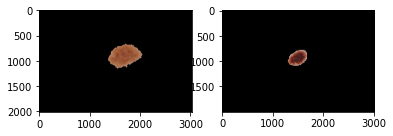

In [ ]:
# Reread images and masks
im = plt.imread(file_image_healthy)
mask = plt.imread(file_mask_healthy)

im_mela = plt.imread(file_image_mela)
mask_mela = plt.imread(file_mask_mela)

# Masking out lesion: Using mask to select non-lesion pixels to color
im_masked = im.copy()
im_masked[mask==0] = 0 # color 0 = black

im_mela_masked = im_mela.copy()
im_mela_masked[mask_mela==0] = 0

# Display both images
f, axarr = plt.subplots(1,2)
axarr[0].imshow(im_masked)
axarr[1].imshow(im_mela_masked)

Cropping images to lesion boundaries:

In [ ]:
def lesionCrop(image, mask):
    # Getting top/bottom and left/right boundries for lesion (code from Mario's notebook)
    top, bottom = find_topbottom(mask)
    left, right = find_leftright(mask)

    im_crop = image[top:bottom+1,left:right+1]

    return(im_crop)

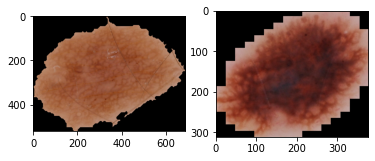

In [ ]:
# Crop color images
im_healthy_crop = lesionCrop(im_masked, mask)
im_mela_crop = lesionCrop(im_mela_masked, mask_mela)

# Display images
f, axarr = plt.subplots(1,2)
axarr[0].imshow(im_healthy_crop)
axarr[1].imshow(im_mela_crop)

<h4 style="color:#ff9900">Detecting image colors</h4>

Link to implementation: https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html

Using skimage _segmentation_ package to detect superpixels:

Healthy: number of segments: 250 
Melanoma: number of segments: 238


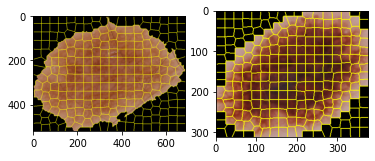

In [ ]:
import numpy as np
from skimage.segmentation import slic # Segments image using k-means clustering in Color-(x,y,z) space
from skimage.segmentation import mark_boundaries # Return image with boundaries between labeled regions highlighted

# Get SLIC boundaries
healthy_segments_slic = slic(im_healthy_crop, n_segments=250, compactness=50, sigma=1, start_label=1)
mela_segments_slic = slic(im_mela_crop, n_segments=250, compactness=50, sigma=1, start_label=1)

# Dispaly SLIC boundaries
f, axarr = plt.subplots(1,2)
axarr[0].imshow(mark_boundaries(im_healthy_crop, healthy_segments_slic))
axarr[1].imshow(mark_boundaries(im_mela_crop, mela_segments_slic))

# Get no. of segments
print(f"Healthy: number of segments: {len(np.unique(healthy_segments_slic))} \nMelanoma: number of segments: {len(np.unique(mela_segments_slic))}")

Accessing a region property: Mean color intensity

In [ ]:
from skimage.measure import regionprops

# Get RegionProps - this includes min/mean/max values for color intensity
regions_healthy = regionprops(healthy_segments_slic, intensity_image=im_healthy_crop) 
regions_mela = regionprops(mela_segments_slic, intensity_image=im_mela_crop)

# Accessing the mean color intensity for each region
mean_intensity_healthy = [r.mean_intensity for r in regions_healthy]
mean_intensity_mela = [r.mean_intensity for r in regions_mela]

# Getting segments with color in them
healthy_color_intensity = []
for mean in mean_intensity_healthy:
    if sum(mean) != 0:
        healthy_color_intensity.append(mean)

mela_color_intensity = []
for mean in mean_intensity_mela:
    if sum(mean) != 0:
        mela_color_intensity.append(mean)

# Getting segemtns with only black
#mean_black_intensity = []
#for mean in mean_intensity:
#    if sum(mean) == 0:
#        mean_black_intensity.append(mean)

# No. of segments in each group
print(f"Helathy: Number of colored segments: {len(healthy_color_intensity)} \nMelanoma: Number of colored segments: {len(mela_color_intensity)}")


Helathy: Number of colored segments: 175 
Melanoma: Number of colored segments: 192


In [ ]:
def isMaskTooCloseToBorder(mask, threshold):

    """
    Outputs if the image is coinciding with the border or is close to the border within specified threshold.
    :mask: 2D numpy array with binary values
    :threshold: number of columns from the edge of the image
    :return: boolean
    """

    # Get the height and width of the mask
    border_height, border_width = mask.shape

    # Check left and right side
    if 1 in mask[:,:threshold] or 1 in mask[:, -threshold:]:
        return True

    # Check bottom and up
    if 1 in mask[:threshold] or 1 in mask[-threshold:]:
        return True
    
    # If image is not too close within any of the borders --> return False
    return False

In [ ]:
border = "/datasets/examplesegmentation/" + "ISIC_0008025" + '_segmentation.png'

im = plt.imread(file_image_healthy)

isMaskTooCloseToBorder(border, 20)

AttributeError: 'str' object has no attribute 'shape'

In [ ]:
mean_intensity_healthy

[array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([3.50754458, 2.5473251 , 1.99108368]),
 array([166.03072812, 115.21576486,  86.01937208]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0.14811784, 0.1096563 , 0.08837971]),
 array([0.13133476, 0.09564597, 0.07637402]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0.25068681, 0.18818681, 0.15659341]),
 array([0.12552011, 0.09292649, 0.07489598]),
 array([0., 0., 0.]),
 array([175.39443155, 118.3866976 ,  85.14075793]),
 array([176.61396777, 120.35149655,  86.97851113]),
 array([170.39922481, 110.46434109,  75.73

In [ ]:
np.array(healthy_color_intensity)

array([[3.50754458e+00, 2.54732510e+00, 1.99108368e+00],
       [1.66030728e+02, 1.15215765e+02, 8.60193721e+01],
       [1.48117840e-01, 1.09656301e-01, 8.83797054e-02],
       [1.31334761e-01, 9.56459672e-02, 7.63740186e-02],
       [2.50686813e-01, 1.88186813e-01, 1.56593407e-01],
       [1.25520111e-01, 9.29264910e-02, 7.48959778e-02],
       [1.75394432e+02, 1.18386698e+02, 8.51407579e+01],
       [1.76613968e+02, 1.20351497e+02, 8.69785111e+01],
       [1.70399225e+02, 1.10464341e+02, 7.57333333e+01],
       [1.74200296e+02, 1.16643016e+02, 8.46696231e+01],
       [1.71481305e+02, 1.12390211e+02, 8.01679130e+01],
       [1.77598060e+02, 1.21920998e+02, 8.96424116e+01],
       [3.61508453e-01, 2.72431730e-01, 2.27568270e-01],
       [1.58207277e+02, 9.10623782e+01, 5.47115010e+01],
       [1.76770345e+02, 1.21739310e+02, 9.14903448e+01],
       [1.72866147e+02, 1.12730994e+02, 7.98583496e+01],
       [1.24653740e-01, 9.00277008e-02, 7.13296399e-02],
       [1.58966236e+02, 9.19145

In [ ]:
healthy_color_intensity = np.array([[val for val in arr] for arr in healthy_color_intensity])
healthy_color_intensity

array([[3.50754458e+00, 2.54732510e+00, 1.99108368e+00],
       [1.66030728e+02, 1.15215765e+02, 8.60193721e+01],
       [1.48117840e-01, 1.09656301e-01, 8.83797054e-02],
       [1.31334761e-01, 9.56459672e-02, 7.63740186e-02],
       [2.50686813e-01, 1.88186813e-01, 1.56593407e-01],
       [1.25520111e-01, 9.29264910e-02, 7.48959778e-02],
       [1.75394432e+02, 1.18386698e+02, 8.51407579e+01],
       [1.76613968e+02, 1.20351497e+02, 8.69785111e+01],
       [1.70399225e+02, 1.10464341e+02, 7.57333333e+01],
       [1.74200296e+02, 1.16643016e+02, 8.46696231e+01],
       [1.71481305e+02, 1.12390211e+02, 8.01679130e+01],
       [1.77598060e+02, 1.21920998e+02, 8.96424116e+01],
       [3.61508453e-01, 2.72431730e-01, 2.27568270e-01],
       [1.58207277e+02, 9.10623782e+01, 5.47115010e+01],
       [1.76770345e+02, 1.21739310e+02, 9.14903448e+01],
       [1.72866147e+02, 1.12730994e+02, 7.98583496e+01],
       [1.24653740e-01, 9.00277008e-02, 7.13296399e-02],
       [1.58966236e+02, 9.19145

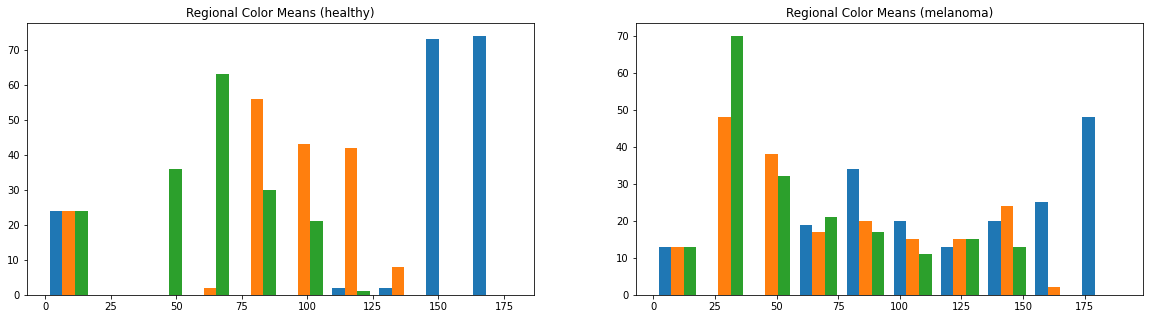

In [ ]:
# Stacking arrays with all values for non-black regions
healthy_color_means = np.vstack(healthy_color_intensity)
mela_color_means = np.vstack(mela_color_intensity)

# Plot histograms of mean color intensities
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20, 5))

ax0.hist(healthy_color_means)
ax0.set_title("Regional Color Means (healthy)")
ax1.hist(mela_color_means)
ax1.set_title("Regional Color Means (melanoma)")
plt.show()

In [ ]:
healthy_color_means

In [ ]:
# Adding threshold of 25
#healthy_means_thresh = healthy_color_means[healthy_color_means > 25]

healthy_color_means.shape

(175, 3)

Visualizing average color intensity: filling in mean intensity for each region:


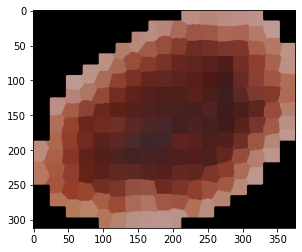

In [ ]:
# Creating function to calculate, create and plot image with region mean color intensity
# https://stackoverflow.com/questions/41578473/how-to-calculate-average-color-of-a-superpixel-in-scikit-image
def mean_color_image(image, label):

    im_rp = image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
    slic_1d = np.reshape(label,-1)    
    uni = np.unique(slic_1d)
    uu = np.zeros(im_rp.shape)
    for i in uni:
        loc = np.where(slic_1d == i)[0]
        #print(loc)
        mm = np.mean(im_rp[loc,:],axis=0)
        uu[loc,:] = mm
    
    im_new = np.reshape(uu,[image.shape[0],image.shape[1],image.shape[2]]).astype('uint8')
    plt.imshow(im_new)

# Display image by calling function
mean_color_image(im_mela_crop, mela_segments_slic)

<h4 style="color:#ff9900">Using RGB -> HSV to compare colors</h4>

HSV color space is consists of 3 matrices, 'hue', 'saturation' and 'value'. 
- Value range for 'hue', 'saturation' and 'value' are respectively 0-179, 0-255 and 0-255.
- 'Hue' represents the color
- 'Saturation' represents the amount to which that respective color is mixed with white
- 'Value' represents the amount to which that respective color is mixed with black.


Dark Value: 0.615686274509804 Light Value: 0.9490196078431372 
Dark Saturation: 0.9299363057324842 Light Saturation: 0.6735537190082644


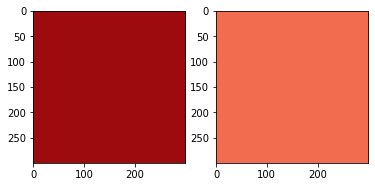

In [ ]:
from skimage.color import rgb2hsv # Converts RGB color to HSV (Hue, Saturation, Value)

# Read two images with dark and light red color for HSV testing
dark_red = plt.imread('/work/fyp2021p03g13/notebooks/exercises/josephine_work/dark_red.jpg')
light_red = plt.imread('/work/fyp2021p03g13/notebooks/exercises/josephine_work/light_red.jpg')

# Get HSV values for both images
dark_hsv = rgb2hsv(dark_red)
light_hsv = rgb2hsv(light_red)

# Get Saturation and Value for both images
dark_value = dark_hsv[:, :, 2]
light_value = light_hsv[:, :, 2]
dark_saturation = dark_hsv[:, :, 1]
light_saturation = light_hsv[:, :, 1]

print('Dark Value:', dark_value[0][0], 'Light Value:', light_value[0][0], '\nDark Saturation:', dark_saturation[0][0], 'Light Saturation:', light_saturation[0][0])

# Display both images
f, axarr = plt.subplots(1,2)
axarr[0].imshow(dark_red)
axarr[1].imshow(light_red)

In [ ]:
axarr[0].imshow(im_healthy_crop)
axarr[1].imshow(im_mela_crop)

im_healthy_crop.shape

(521, 688, 3)

In [ ]:
im_hsv = rgb2hsv(im_healthy_crop)

(521, 688)

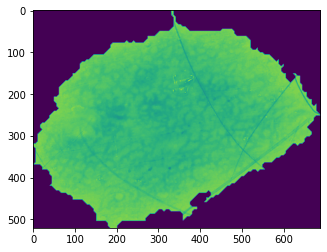

In [ ]:
im_hsv_value = im_hsv[:,:,2]
plt.imshow(im_hsv_value)



im_hsv_value.shape

(array([[515.,   0.,   0., ...,   3.,   3.,   0.],
        [513.,   0.,   0., ...,   4.,   4.,   0.],
        [511.,   0.,   0., ...,   4.,   6.,   0.],
        ...,
        [518.,   0.,   0., ...,   2.,   0.,   0.],
        [519.,   0.,   0., ...,   2.,   0.,   0.],
        [520.,   0.,   0., ...,   1.,   0.,   0.]]),
 array([0.        , 0.08980392, 0.17960784, 0.26941176, 0.35921569,
        0.44901961, 0.53882353, 0.62862745, 0.71843137, 0.80823529,
        0.89803922]),
 <a list of 688 BarContainer objects>)

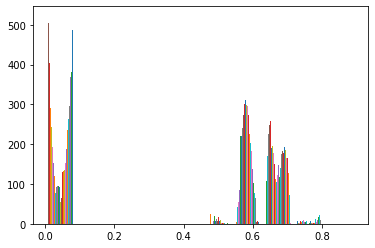

In [ ]:
plt.hist(im_hsv_value)

In [ ]:
im_value_filt = im_hsv_value[im_hsv_value > 0.4]

In [ ]:
im_hsv_value[100][40]

0.0

In [ ]:
dark_red.shape

(300, 300, 3)

Conclusoin: 'Value' seems to have the biggest contrast when measuring the difference between the two picture colors. Maybe this can be used to quantify the degree of variation within each picture.

Exploring HSV on a color image of lesion:

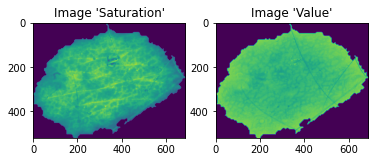

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Convert cropped lesion image to HSV
im_mela_hsv = rgb2hsv(im_healthy_crop)

# Extract Value and Saturation values
im_mela_saturation = im_mela_hsv[:, :, 1]
im_mela_value = im_mela_hsv[:, :, 2]

# Display both values
f, axarr = plt.subplots(1,2)
axarr[0].imshow(im_mela_saturation)
axarr[0].set_title("Image 'Saturation'")
axarr[1].imshow(im_mela_value)
axarr[1].set_title("Image 'Value'")
plt.show()

im_mela_hsv[:, :, 1]

In [ ]:
from skimage import segmentation, color
from skimage.io import imread
from skimage.future import graph
from matplotlib import pyplot as plt

img_segments = segmentation.slic(im_healthy_crop, compactness=20, n_segments=300)
superpixels = color.label2rgb(img_segments, im_healthy_crop, kind='avg')

superpixels

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  import sys


AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [ ]:
im_healthy_crop.shape

(521, 688, 3)

In [ ]:
healthy_color_intensity

[array([3.50754458, 2.5473251 , 1.99108368]),
 array([166.03072812, 115.21576486,  86.01937208]),
 array([0.14811784, 0.1096563 , 0.08837971]),
 array([0.13133476, 0.09564597, 0.07637402]),
 array([0.25068681, 0.18818681, 0.15659341]),
 array([0.12552011, 0.09292649, 0.07489598]),
 array([175.39443155, 118.3866976 ,  85.14075793]),
 array([176.61396777, 120.35149655,  86.97851113]),
 array([170.39922481, 110.46434109,  75.73333333]),
 array([174.20029564, 116.64301552,  84.66962306]),
 array([171.48130523, 112.39021074,  80.16791298]),
 array([177.5980596 , 121.92099792,  89.64241164]),
 array([0.36150845, 0.27243173, 0.22756827]),
 array([158.20727745,  91.06237817,  54.71150097]),
 array([176.77034483, 121.73931034,  91.49034483]),
 array([172.86614685, 112.73099415,  79.85834958]),
 array([0.12465374, 0.0900277 , 0.07132964]),
 array([158.96623563,  91.91451149,  57.31824713]),
 array([166.79618321, 103.20687023,  69.34427481]),
 array([162.3937636 ,  95.65772299,  60.10659898]),
 a

Using 'region color intensity mean' to get HSV values for each region:

In [ ]:
healthy_color_intensity

[array([3.50754458, 2.5473251 , 1.99108368]),
 array([166.03072812, 115.21576486,  86.01937208]),
 array([0.14811784, 0.1096563 , 0.08837971]),
 array([0.13133476, 0.09564597, 0.07637402]),
 array([0.25068681, 0.18818681, 0.15659341]),
 array([0.12552011, 0.09292649, 0.07489598]),
 array([175.39443155, 118.3866976 ,  85.14075793]),
 array([176.61396777, 120.35149655,  86.97851113]),
 array([170.39922481, 110.46434109,  75.73333333]),
 array([174.20029564, 116.64301552,  84.66962306]),
 array([171.48130523, 112.39021074,  80.16791298]),
 array([177.5980596 , 121.92099792,  89.64241164]),
 array([0.36150845, 0.27243173, 0.22756827]),
 array([158.20727745,  91.06237817,  54.71150097]),
 array([176.77034483, 121.73931034,  91.49034483]),
 array([172.86614685, 112.73099415,  79.85834958]),
 array([0.12465374, 0.0900277 , 0.07132964]),
 array([158.96623563,  91.91451149,  57.31824713]),
 array([166.79618321, 103.20687023,  69.34427481]),
 array([162.3937636 ,  95.65772299,  60.10659898]),
 a

In [ ]:
from numpy import newaxis
b = a[:, None, :]
b[:,:,0]


array([[  3.50754458],
       [166.03072812],
       [  0.14811784],
       [  0.13133476],
       [  0.25068681],
       [  0.12552011],
       [175.39443155],
       [176.61396777],
       [170.39922481],
       [174.20029564],
       [171.48130523],
       [177.5980596 ],
       [  0.36150845],
       [158.20727745],
       [176.77034483],
       [172.86614685],
       [  0.12465374],
       [158.96623563],
       [166.79618321],
       [162.3937636 ],
       [170.0387538 ],
       [  0.11185819],
       [178.0665742 ],
       [169.32110682],
       [156.41558442],
       [173.21619813],
       [172.2047619 ],
       [153.3773833 ],
       [163.71928666],
       [179.075     ],
       [159.79474775],
       [  0.12087186],
       [159.83369803],
       [155.26099925],
       [156.75071429],
       [165.6946284 ],
       [  0.97410468],
       [162.92582954],
       [168.66688919],
       [174.3974359 ],
       [148.50653595],
       [153.11382114],
       [165.75997201],
       [177

In [ ]:
# Converting region color means to HSV
healthy_hsv = rgb2hsv(np.array(healthy_color_intensity))
#mela_hsv = rgb2hsv(np.array(mela_color_intensity))

# Extracting 'Value' values for each mean
healthy_value = healthy_hsv[:,0]
#mela_value = mela_hsv[:,1]

np.set_printoptions(suppress=True)
healthy_value

array([0.43234259, 0.48190692, 0.40331492, 0.41847826, 0.37534247,
       0.40331492, 0.51457548, 0.5075219 , 0.55555353, 0.51395247,
       0.53249765, 0.49525118, 0.3705036 , 0.65417835, 0.48243386,
       0.53803361, 0.42777778, 0.63943131, 0.58425742, 0.62987126,
       0.5866131 , 0.3989071 , 0.48296933, 0.57289501, 0.65277317,
       0.53341577, 0.57218704, 0.66180713, 0.61513449, 0.44903244,
       0.62516272, 0.3989071 , 0.65497965, 0.68779328, 0.63504381,
       0.62909952, 0.45079186, 0.62553261, 0.59880948, 0.52652601,
       0.65350879, 0.5780235 , 0.60755854, 0.48337407, 0.40558075,
       0.65641477, 0.41847826, 0.68840932, 0.67528462, 0.68733059,
       0.67379467, 0.62080821, 0.61318827, 0.4657334 , 0.65208497,
       0.57693369, 0.37671233, 0.69118454, 0.53891305, 0.64325633,
       0.63335994, 0.66040235, 0.62621779, 0.6566077 , 0.68886608,
       0.66674437, 0.60971958, 0.57058626, 0.61194582, 0.45825559,
       0.41004696, 0.72358806, 0.64813514, 0.59346705, 0.50018

In [ ]:
# Color means as array
col_arr = np.array(healthy_color_intensity)

# Creating 3d array for converter
col_arr3 = col_arr[:, None, :]

# Converting region color means to HSV
healthy_hsv = rgb2hsv(col_arr3)
#mela_hsv = rgb2hsv(np.array(mela_color_intensity))

# Extracting 'Value' values for each mean
healthy_value = healthy_hsv[:,1]
#mela_value = mela_hsv[:,1]

np.set_printoptions(suppress=True)
healthy_value

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
np.set_printoptions(suppress=True)
healthy_value

array([  3.50754458, 166.03072812,   0.14811784,   0.13133476,
         0.25068681,   0.12552011, 175.39443155, 176.61396777,
       170.39922481, 174.20029564, 171.48130523, 177.5980596 ,
         0.36150845, 158.20727745, 176.77034483, 172.86614685,
         0.12465374, 158.96623563, 166.79618321, 162.3937636 ,
       170.0387538 ,   0.11185819, 178.0665742 , 169.32110682,
       156.41558442, 173.21619813, 172.2047619 , 153.3773833 ,
       163.71928666, 179.075     , 159.79474775,   0.12087186,
       159.83369803, 155.26099925, 156.75071429, 165.6946284 ,
         0.97410468, 162.92582954, 168.66688919, 174.3974359 ,
       148.50653595, 153.11382114, 165.75997201, 177.74216524,
       176.87240829, 157.48268698,   0.1218543 , 149.20569395,
       146.08386638, 149.82716927, 155.07923698, 165.03244412,
       153.25829726, 179.46384615, 157.07666667, 165.43894602,
         0.6088407 , 144.48612946, 172.6119403 , 154.17232022,
       151.81094183, 147.52896022, 149.18970381, 146.59

In [ ]:
# Display both values
f, axarr = plt.subplots(1,2)
axarr[0].boxplot(healthy_value)
axarr[0].set_title("Healthy: Value distribution")
axarr[1].boxplot(mela_value)
axarr[1].set_title("Melanoma: Value distribution")
plt.show()

# Getting min and max 'Value'
#print("Max:", max(color_means_value), "\nMin:", min(color_means_value))

In [ ]:
healthy_value

array([3.50754458e+00, 1.66030728e+02, 1.48117840e-01, 1.31334761e-01,
       2.50686813e-01, 1.25520111e-01, 1.75394432e+02, 1.76613968e+02,
       1.70399225e+02, 1.74200296e+02, 1.71481305e+02, 1.77598060e+02,
       3.61508453e-01, 1.58207277e+02, 1.76770345e+02, 1.72866147e+02,
       1.24653740e-01, 1.58966236e+02, 1.66796183e+02, 1.62393764e+02,
       1.70038754e+02, 1.11858191e-01, 1.78066574e+02, 1.69321107e+02,
       1.56415584e+02, 1.73216198e+02, 1.72204762e+02, 1.53377383e+02,
       1.63719287e+02, 1.79075000e+02, 1.59794748e+02, 1.20871863e-01,
       1.59833698e+02, 1.55260999e+02, 1.56750714e+02, 1.65694628e+02,
       9.74104683e-01, 1.62925830e+02, 1.68666889e+02, 1.74397436e+02,
       1.48506536e+02, 1.53113821e+02, 1.65759972e+02, 1.77742165e+02,
       1.76872408e+02, 1.57482687e+02, 1.21854305e-01, 1.49205694e+02,
       1.46083866e+02, 1.49827169e+02, 1.55079237e+02, 1.65032444e+02,
       1.53258297e+02, 1.79463846e+02, 1.57076667e+02, 1.65438946e+02,
      

Quantifying the spread of the two distributions: Computing the IQR of 'value' for each image.

In [ ]:
def IQR(array):
    q1_x = np.quantile(array, 0.25, interpolation='midpoint')
    #print(q1_x)
    q3_x = np.quantile(array, 0.75, interpolation='midpoint')
    #print(q3_x)
    return(q3_x - q1_x)

print("IQR Healthy:", IQR(healthy_value), "\nIQR Melanoma:", IQR(mela_value))

IQR Healthy: 20.389189774607786 
IQR Melanoma: 85.9771349202238


In [ ]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [ ]:
mela_value

array([  0.40251572, 185.54510557, 184.16539924, 187.82149712,
       189.5877551 , 190.61770624,   0.36862004, 184.79193206,
       182.66037736, 169.72190476, 191.18181818,   0.46191646,
       157.67362429, 158.19375   , 169.74395161, 171.16317992,
       181.71369295,   0.39626556, 183.57228916, 151.97773655,
       179.75711575, 132.60869565, 106.53386454, 113.40040241,
       128.24448898, 165.87201735, 122.80425532, 161.21308017,
       178.50793651, 189.01057082, 152.59770115, 186.56147541,
       168.54940711, 120.30113636, 101.6003861 , 144.18250951,
       134.09148936,  95.98553719,  88.43801653,  79.83744856,
       115.68356998, 168.15632184,   0.34495413, 187.84313725,
       187.76234004,   0.41101695, 122.38537549, 139.34545455,
       159.3447619 , 170.81836735, 101.15319149,  98.6798419 ,
        91.98367347,  88.08677686,  78.03719008,  68.23553719,
       102.12653061, 143.17943107, 175.50551876, 190.34291581,
       175.92798354, 125.85333333,  96.71769384, 133.92

In [ ]:
print("SD Healthy:", np.std(healthy_value), "\nSD Melanoma:", np.std(mela_value))

SD Healthy: 56.25780088026558 
SD Melanoma: 52.80136248178442


Collecting everything into functions - computing the spread of the mean color 'values':

In [ ]:
# Get list of image ids
image_id = list(GROUND_TRUTH_RAW["image_id"])

# Redefine filenames related to image id's
file_image_healthy = PATH_DATA["pictures-examples-raw"] + image_id[0] + '.jpg'
file_mask_healthy = PATH_DATA["pictures-segment-raw"] + image_id[0] + '_segmentation.png'

file_image_mela = PATH_DATA["pictures-examples-raw"] + 'ISIC_0012099' + '.jpg'
file_mask_mela = PATH_DATA["pictures-segment-raw"] + 'ISIC_0012099' + '_segmentation.png'

# Reread images and masks
im = plt.imread(file_image_healthy)
mask = plt.imread(file_mask_healthy)

In [ ]:
## These two functions are from Mario's notebook ##
# Function to get top / bottom boundaries of lesion
def find_topbottom(mask):
    for index,row in enumerate(mask):
        if sum(row)>0:
            top = index
            break
    found = False
    for index,row in enumerate(mask[top:]):
        if sum(row)==0:
            bottom = index + top - 1
            found = True
            break
    if not found: # In case the 1s go all the way down to the bottom and therefore bottom is never assigned in the loop
        bottom = len(mask)-1 
    return top, bottom

# Function to get left / right boundaries of lesion
def find_leftright(mask):
    for index,column in enumerate(mask.T):
        if sum(column)>0:
            left = index
            break
    found = False
    for index,column in enumerate(mask.T[left:]):
        if sum(column)==0:
            right = index + left - 1
            found = True
            break
    if not found: # In case the 1s go all the way to the right and therefore right is never assigned in the loop
        right = len(mask.T)-1 
    return left, right

In [ ]:
def lesionMaskCrop(image, mask):
    '''
    This function masks and crops an area of a color image corresponding to a binary mask of same dimension.

    :image: RGB image read as numpy.array
    :mask: Corresponding binary mask as numpy.array
    '''
    # Getting top/bottom and left/right boundries of lesion
    top, bottom = find_topbottom(mask)
    left, right = find_leftright(mask)

    # Masking out lesion in color image
    im_masked = image.copy()
    im_masked[mask==0] = 0 # color 0 = black

    # Cropping image using lesion boundaries
    im_crop = im_masked[top:bottom+1,left:right+1]

    return(im_crop)

#im_test = lesionMaskCrop(im, mask)
#plt.imshow(im_test)

In [ ]:
from skimage.segmentation import slic # Segments image using k-means clustering in Color-(x,y,z) space
from skimage.measure import regionprops
from skimage.color import rgb2hsv # Converts RGB color to HSV (Hue, Saturation, Value)

def colorValueSpread(image, mask):

    # Mask and crop image to contain only lesion
    im_lesion = lesionMaskCrop(image, mask)

    # Get SLIC boundaries
    segments = slic(im_lesion, n_segments=250, compactness=50, sigma=1, start_label=1)

    # Fetch RegionProps - this includes min/mean/max values for color intensity
    regions = regionprops(segments, intensity_image=im_lesion)

    # Access mean color intensity for each region
    mean_intensity = [r.mean_intensity for r in regions]

    # Getting only segments with color in them
    color_intensity = []
    for mean in mean_intensity:
        if sum(mean) != 0:
            color_intensity.append(mean)

    # Stack arrays with mean values for colored regions
    color_mean = np.vstack(color_intensity)

    # Converting RGB color means to HSV
    color_mean_hsv = rgb2hsv(color_mean)

    # Extracting 'Value' values for each mean
    color_mean_value = color_mean_hsv[:,2]

    # Computing IQR range for color values
    q1 = np.quantile(color_mean_value, 0.25, interpolation='midpoint')
    q3 = np.quantile(color_mean_value, 0.75, interpolation='midpoint')
    
    return(q3 - q1)

In [ ]:
colorValueSpread(im_mela, mask_mela)

85.9771349202238

<h3 style="color:green">Checking if lesion mask reaches outside image borders</h3>

Example mask: Lesion outside image border

(768, 1024)

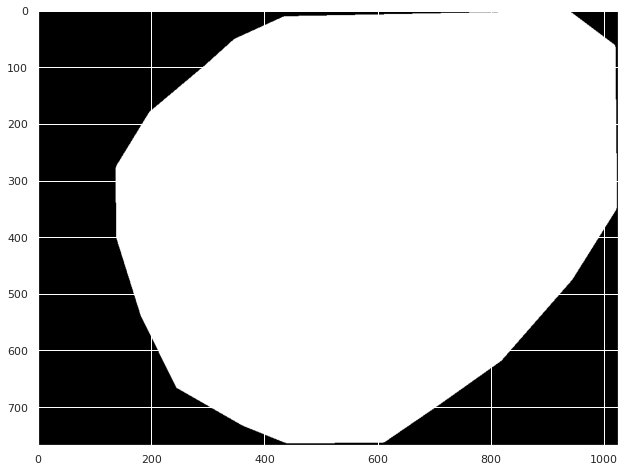

In [ ]:
seg_coincide = PATH_DATA["pictures-segment-raw"] + image_id[24] + '_segmentation.png'
mask_coincide = plt.imread(seg_coincide)
plt.imshow(mask_coincide, cmap='gray')

mask_coincide.shape

In [ ]:
def lesionCoincide(image):
    '''
    Takes in an RGB color image as numpy.array. Outputs whether the lesion
     is coinciding with the image borders (outermost 10 pixel frame of image).
    Returns True if it coincides, False if not.
    '''
    row_max, col_max = image.shape
    if 1 in image[:, 0:10] or 1 in image[:, col_max-11:col_max-1]:
        return True
    if 1 in image[0:10, :] or 1 in image[row_max-11:row_max-1, :]:
        return True
    else:
        return False

#[:,0] # first column
#[:,col_max-1] # last column
#[0,:] # first row
#[row_max-1,:] # last row

In [ ]:
lesionCoincide(mask_coincide)

True

Checking all masks for lesion coincide:

In [ ]:
x = FEATURES_RAW.shape[0]
mask_indices = []

for i in range(x):
    mask = plt.imread(PATH_DATA["pictures-segment-raw"] + image_id[i] + '_segmentation.png')
    if lesionCoincide(mask):
        mask_indices.append(i)

        print('Image', image_id[i] + '_segmentation.png', 'is too zoomed in (Image no. '+str(i)+')')

print('Number of lesions touching image border:', len(mask_indices))

Image ISIC_0009995_segmentation.png is too zoomed in (Image no. 23)
Image ISIC_0010459_segmentation.png is too zoomed in (Image no. 24)
Image ISIC_0012254_segmentation.png is too zoomed in (Image no. 40)
Image ISIC_0012417_segmentation.png is too zoomed in (Image no. 50)
Image ISIC_0013828_segmentation.png is too zoomed in (Image no. 90)
Image ISIC_0014037_segmentation.png is too zoomed in (Image no. 94)
Image ISIC_0014212_segmentation.png is too zoomed in (Image no. 101)
Image ISIC_0014688_segmentation.png is too zoomed in (Image no. 123)
Image ISIC_0014712_segmentation.png is too zoomed in (Image no. 124)
Image ISIC_0014857_segmentation.png is too zoomed in (Image no. 127)
Image ISIC_0014937_segmentation.png is too zoomed in (Image no. 129)
Image ISIC_0014979_segmentation.png is too zoomed in (Image no. 132)
Image ISIC_0014985_segmentation.png is too zoomed in (Image no. 133)
Image ISIC_0015062_segmentation.png is too zoomed in (Image no. 136)
Image ISIC_0015211_segmentation.png is t

Cheking random images retrived from function:

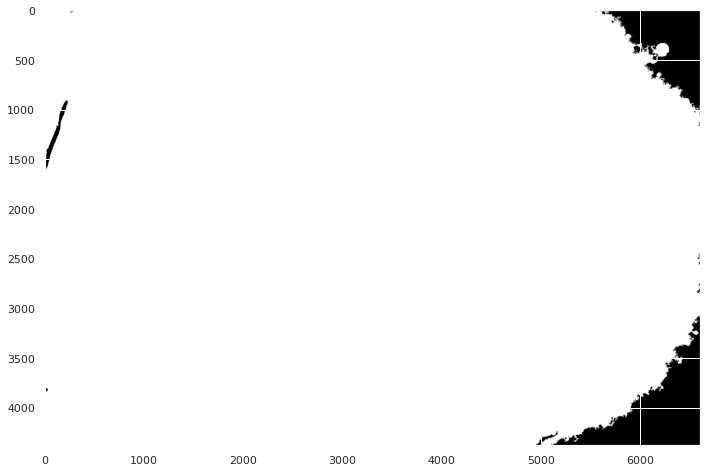

In [ ]:
image_coincide = PATH_DATA["pictures-segment-raw"] + image_id[136] + '_segmentation.png'
mask_coincide = plt.imread(image_coincide)
plt.imshow(mask_coincide, cmap='gray')

<h3 style="color:green">Plotting feature</h3>

<h4 style="color:#ff9900">Merging data sets</h4>

In [ ]:
FEATURES_RAW = FEATURES_RAW.rename(columns={"id": "image_id"}) # renaming 'id' for merge
GT_FEATURES = FEATURES_RAW.merge(GROUND_TRUTH_RAW, how='inner', on=['image_id'])

# Cheking size of df
print(GT_FEATURES.shape)

# Checking variables in df
print(GT_FEATURES.keys())

(150, 5)
Index(['image_id', 'area', 'perimeter', 'melanoma', 'seborrheic_keratosis'], dtype='object')


<h4 style="color:#ff9900">Adding asymmerty value to df</h4>

In [ ]:
asymmetry = list()
for image_id in GT_FEATURES["image_id"]:

    # Get mask for the given image object
    file_image = PATH_DATA["pictures-segment-raw"] + image_id + '_segmentation.png'
    mask = plt.imread(file_image)

    # Compute the assymetry
    asymmetry_result = computeAsymmetry(mask)

    # Save it to the lists
    asymmetry.append(asymmetry_result)

# Save the result to the DF
GT_FEATURES["asymmetry"] = asymmetry

# Show the result
GT_FEATURES["asymmetry"].describe()

<h2 style="color:#22198A">Task 2: Implementing features</h2>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a47fbf6-c653-4328-90db-f0771def66a6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>